**TITANIC SURVIVAL PREDICTION**

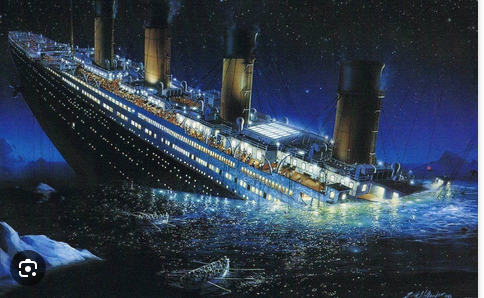

**Objective of study**

To Build a prediction model that predicts whether the passenger on the Titanic survived or not.

**Attribute Information :**

The Titanic Dataset contain following information

*   PassengerID :ID for passenger.
*   Survived :Survival(0==>No, 1==>yes)
*   Pclass  : Passenger Class(1=Ist,2=2nd,3=3rd)
*   Name : Passenger Name
*   Sex : Sex of Passenger
*   Age : Age of Passenger
*   sibsp : Number of siblings/spouses aboard
*   Parch : Number of parents/children aboard
*   Ticket : Ticket number
*   Fare :Passenger Fare(british pounds)
*   Cabin : Cabin number
*   Embarked : Port of embarkation









In [158]:
# Importing essential Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
#Loading dataset;
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Data Preprocessing.**

In [160]:
#Information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [161]:
#Printing First 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [162]:
# Printing Last 5 rows.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [163]:
# Description of dataset.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [164]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [165]:
df.shape

(418, 12)

In [166]:
# Checking number of missing values.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [167]:
# Dropping unneccessary Columns  : PassengerId,Name,Ticket,Cabin(cabin contain lot of missing values)
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [168]:
# handling Missing values : age, fare
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [169]:
Embarked=df['Embarked'].unique()
print(Embarked)

['Q' 'S' 'C']


In [170]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [171]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(float)

**Data Visualization.**

([<matplotlib.patches.Wedge at 0x7f8db9ecdf60>,
 [Text(-0.45695648023571717, 1.000595210447554, 'Survived'),
  Text(0.4569564802357173, -1.000595210447554, 'Not Survived')])

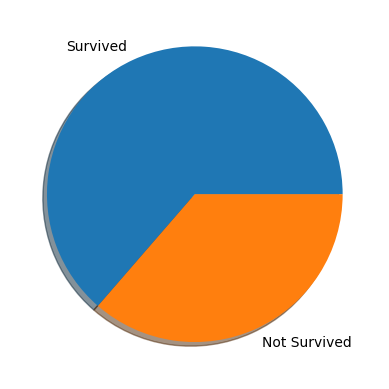

In [172]:
label=['Survived','Not Survived']
plt.pie(x=df['Survived'].value_counts(),labels=label,shadow=True)

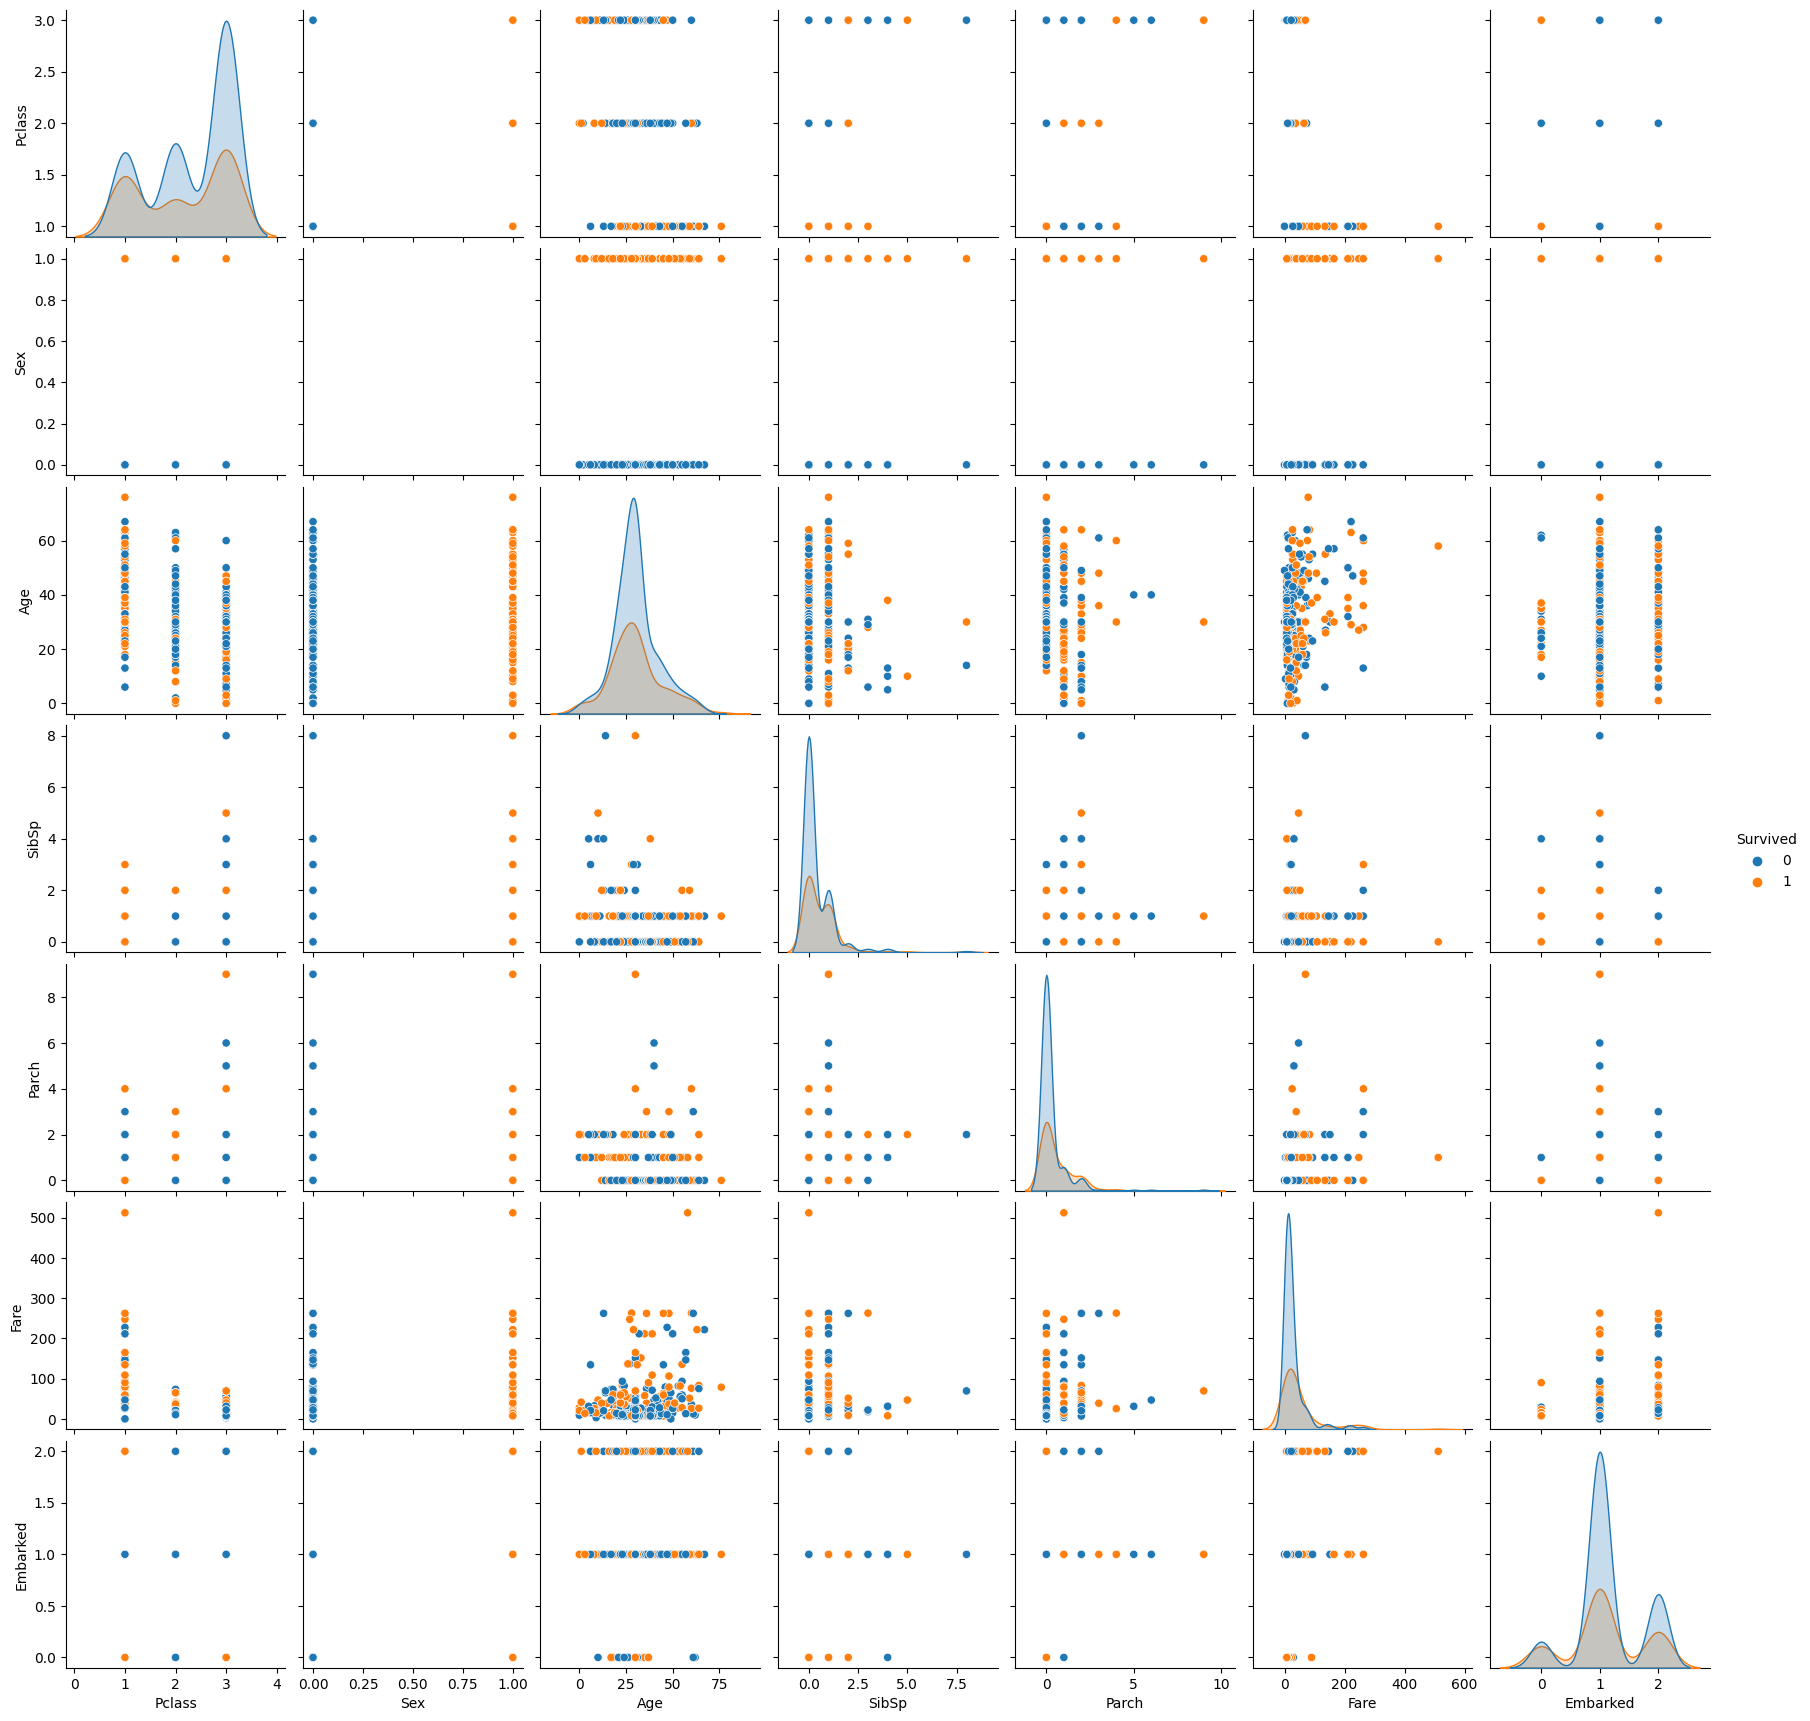

In [173]:
sns.pairplot(data=df,hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

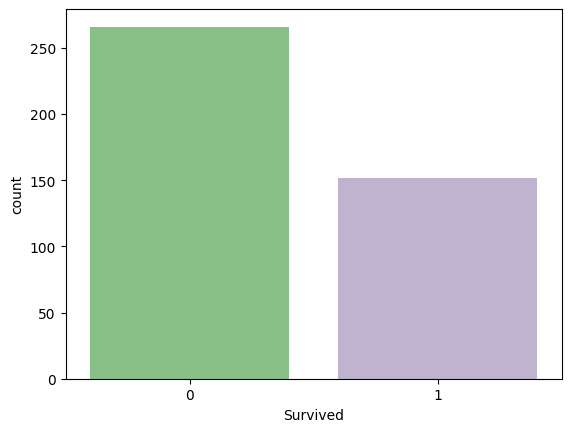

In [174]:
sns.countplot(x=df['Survived'],data=df,palette='Accent')

<Axes: >

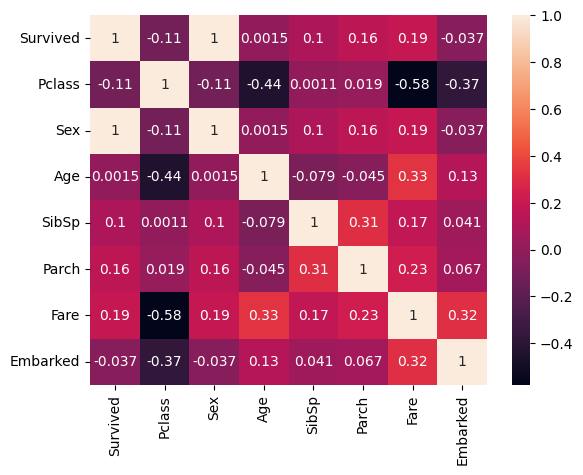

In [175]:
sns.heatmap(df.corr(),annot=True)

**Model Creation.**

In [176]:
# seperating x and y
x=df.drop('Survived',axis=1)
y=df['Survived']

In [177]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,1,0,36,0,0,75.2417,2
271,3,0,30,0,0,7.7500,0
114,1,1,63,1,0,221.7792,1
311,3,0,22,0,0,7.2250,2
131,1,0,53,0,0,28.5000,2
...,...,...,...,...,...,...,...
71,3,0,21,0,0,7.8958,1
106,3,0,21,0,0,7.8208,0
270,1,0,46,0,0,75.2417,2
348,2,0,24,0,0,13.5000,1


In [178]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,0,25,0,0,7.2292,2
324,1,1,39,0,0,211.3375,1
388,3,0,21,0,0,7.7500,0
56,3,0,35,0,0,7.8958,1
153,3,1,36,0,2,12.1833,1
...,...,...,...,...,...,...,...
101,2,0,27,1,0,26.0000,1
310,3,0,18,0,0,8.6625,1
29,3,0,30,2,0,21.6792,2
195,3,0,33,0,0,7.8542,1


In [179]:
y_train

118    0
271    0
114    1
311    0
131    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 292, dtype: int64

In [180]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
101    0
310    0
29     0
195    0
390    0
Name: Survived, Length: 126, dtype: int64

In [181]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
knn=KNeighborsClassifier()
base=GaussianNB()
model=SVC()
lst=[knn,base,model]

**Performance Evaluation.**

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('-'*100)
  print("Accuray_score = ",accuracy_score(y_test,y_pred))
  print(' '*100)
  print(confusion_matrix(y_test,y_pred))
  print(' '*100)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
Accuray_score =  0.9841269841269841
                                                                                                    
[[85  0]
 [ 2 39]]
                                                                                                    
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.95      0.97        41

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

GaussianNB()
----------------------------------------------------------------------------------------------------
Accuray_score =  1.0
                                                                                                    
[[85  0]
 [ 0 41]]
                                     